<a href="https://colab.research.google.com/github/riyaz7781/riyaz7781/blob/main/SLR(Question_2)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sa

Load Dataset

In [ ]:
data1=pd.read_csv("/content/Salary_Data.csv")
data1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Basic EDA and Data Visualisation

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<ipython-input-9-259b4d359b7f>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


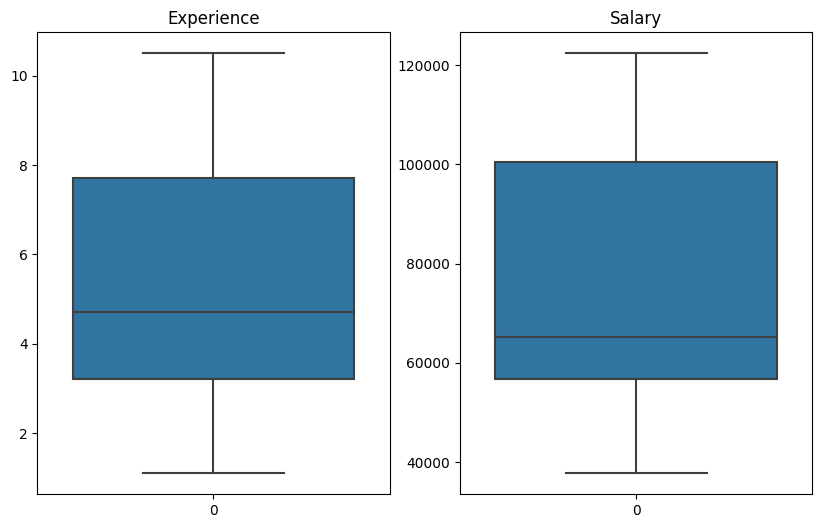

In [ ]:
plt.subplots(figsize=(10,6))
plt.subplot(121)
sns.boxplot(data1["YearsExperience"])
plt.title("Experience")
plt.subplot(122)
sns.boxplot(data1["Salary"])
plt.title("Salary")
plt.show()

As we can observe that there is no outliers in the data

**Correlation** **Analysis**

In [ ]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


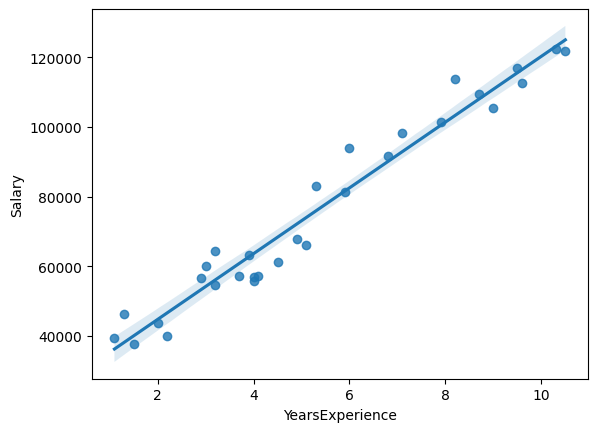

In [ ]:
sns.regplot(x=data1["YearsExperience"],y=data1["Salary"])
plt.show()

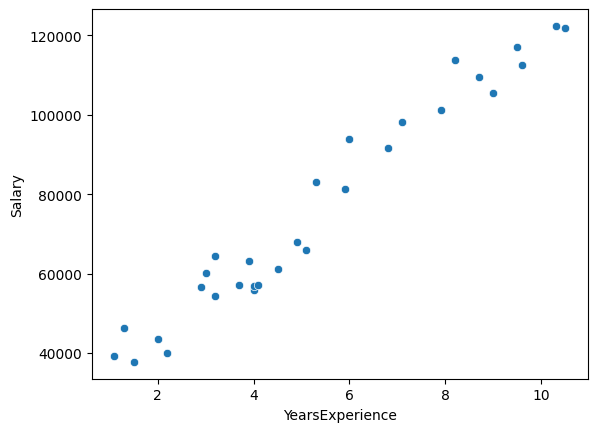

In [ ]:
sns.scatterplot(x=data1["YearsExperience"],y=data1["Salary"])
Bplt.show()

Building the model


In [ ]:
model=smf.ols("Salary~YearsExperience",data=data1).fit()

Model Testing

In [ ]:
model.params


Intercept   -2.383161
Salary       0.000101
dtype: float64

In [ ]:
model.tvalues,model.pvalues

(Intercept    -7.281283
 Salary       24.950094
 dtype: float64,
 Intercept    6.300123e-08
 Salary       1.143068e-20
 dtype: float64)

In [ ]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Residual Analysis

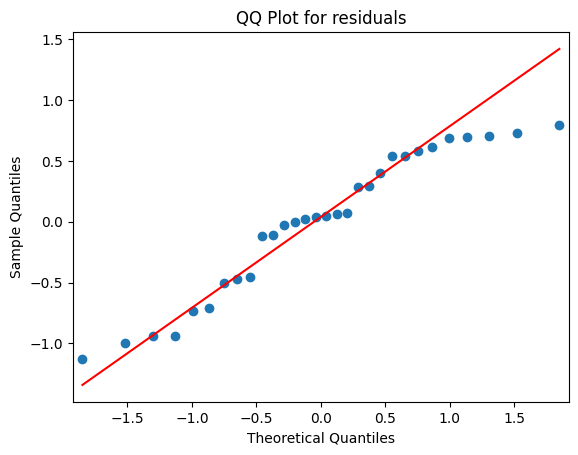

In [ ]:
sa.qqplot(model.resid,line="q")
plt.title("QQ Plot for residuals")
plt.show()

Model Predictions

In [ ]:
new_data=pd.DataFrame([3,4,6],columns=["YearsExperience"])
new_data

,YearsExperience
0,3
1,4
2,6


In [ ]:
model.predict(new_data)

0    54142.087163
1    63592.049484
2    82491.974127
dtype: float64